# Configurations

In [2]:
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import *

'''Path to each folder and files'''
calibra = 'dataset/meas_14_7/data/DATA_MACHINE_7-14/MEAS_1'  # path to
calibra_pairs = 'dataset/meas_14_7/calibration/calibration_15_7'  # path to 
pairs_5200 = 'dataset/meas_7_7/procIMGs'
pairs_1100 = 'dataset/meas_7_7/procIMGs_2'


# Data Loading

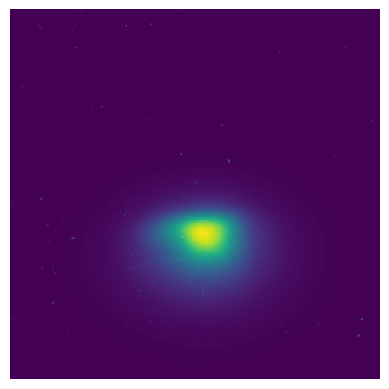

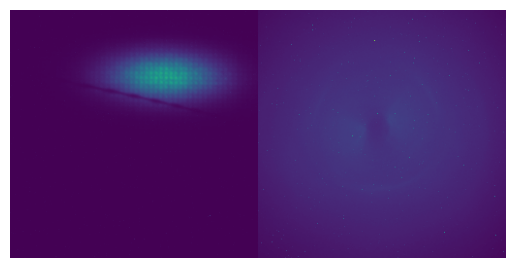

In [3]:
'''load the calibration data'''
calibration_img = []

for i in get_all_file_paths(calibra):
    with open(i, 'rb') as file:
        loaded_data = pickle.load(file)  # Unpickling (deserializing)
    calibration_img.append(Image.fromarray(loaded_data['img']))  # Convert the NumPy array to an image using PIL

'''load the calibration fiber input/output data pairs'''
calibration_img_pairs = get_all_images(calibra_pairs)


plt.imshow(calibration_img[101])
plt.axis('off')  # To turn off the axis
plt.show()

plt.imshow(calibration_img_pairs[502])
plt.axis('off')  # Turn off the axis
plt.show()

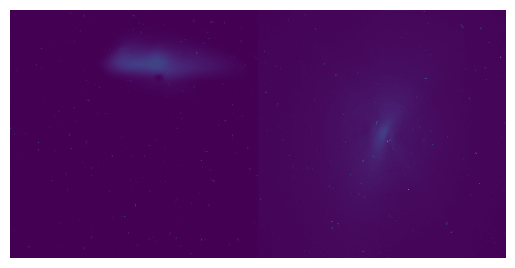

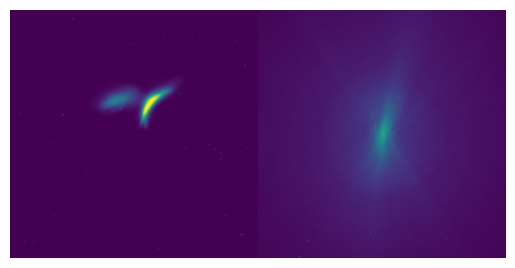

In [4]:
'''5200 pairs of samples'''
pairs_5200_images = get_all_images(pairs_5200)

'''1100 pairs of samples'''
pairs_1100_images = get_all_images(pairs_1100)

plt.imshow(pairs_5200_images[101])
plt.axis('off')  # To turn off the axis
plt.show()

plt.imshow(pairs_5200_images[32])
plt.axis('off')  # Turn off the axis
plt.show()

## Model Construction (pix2pix)

In [7]:
img_array = np.array(pairs_5200_images[32])
img_array.shape

(256, 512, 4)

In [1]:

import tensorflow as tf
import pathlib
import time
import datetime

def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

